In [4]:
import cv2
print(cv2.__version__)


4.12.0


**DATA PREPROCESSING**

In [1]:
import cv2
import os
import numpy as np

# Input and output directories
input_dir = 'dataset'
output_dir = 'processed_dataset'

# Target size
target_size = (256, 256)

# Create output folders
os.makedirs(output_dir, exist_ok=True)
for cls in ['COVID', 'NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(output_dir, cls), exist_ok=True)

# Loop through each class folder
for cls in ['COVID', 'NORMAL', 'PNEUMONIA']:
    input_path = os.path.join(input_dir, cls)
    output_path = os.path.join(output_dir, cls)
    
    for img_name in os.listdir(input_path):
        img_path = os.path.join(input_path, img_name)
        
        # Read image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping {img_name}, cannot read file.")
            continue
        
        # Resize to 256x256
        img_resized = cv2.resize(img, target_size)

        # Convert to LAB color space for contrast enhancement
        lab = cv2.cvtColor(img_resized, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)

        # Apply CLAHE to L-channel
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)

        # Merge channels and convert back to BGR
        merged_lab = cv2.merge((cl, a, b))
        img_contrast = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

        # Save processed image
        save_path = os.path.join(output_path, img_name)
        cv2.imwrite(save_path, img_contrast)

        print(f"Processed and saved: {save_path}")

print("✅ All images processed and saved to 'processed_dataset'.")


Processed and saved: processed_dataset\COVID\COVID.png
Processed and saved: processed_dataset\COVID\COVID_10.png
Processed and saved: processed_dataset\COVID\COVID_100.png
Processed and saved: processed_dataset\COVID\COVID_1000.png
Processed and saved: processed_dataset\COVID\COVID_1001.png
Processed and saved: processed_dataset\COVID\COVID_1002.png
Processed and saved: processed_dataset\COVID\COVID_1003.png
Processed and saved: processed_dataset\COVID\COVID_1004.png
Processed and saved: processed_dataset\COVID\COVID_1005.png
Processed and saved: processed_dataset\COVID\COVID_1006.png
Processed and saved: processed_dataset\COVID\COVID_1007.png
Processed and saved: processed_dataset\COVID\COVID_1008.png
Processed and saved: processed_dataset\COVID\COVID_1009.png
Processed and saved: processed_dataset\COVID\COVID_101.png
Processed and saved: processed_dataset\COVID\COVID_1010.png
Processed and saved: processed_dataset\COVID\COVID_1011.png
Processed and saved: processed_dataset\COVID\COVI

**DATA SPLITTING**

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define main directory
base_dir = 'processed_dataset'

# Output directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't exist
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Classes
classes = ['COVID', 'NORMAL', 'PNEUMONIA']

# Split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Loop through each class
for cls in classes:
    print(f"\nProcessing class: {cls}")
    
    # Input path (already processed images)
    class_dir = os.path.join(base_dir, cls)
    images = os.listdir(class_dir)
    
    # Train-test split
    train_files, temp_files = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)
    
    # Create subdirectories for each class
    for split, file_list in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        split_class_dir = os.path.join(base_dir, split, cls)
        os.makedirs(split_class_dir, exist_ok=True)
        
        # Copy files
        for file_name in file_list:
            src = os.path.join(class_dir, file_name)
            dst = os.path.join(split_class_dir, file_name)
            shutil.copy(src, dst)
    
    print(f"  -> Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

print("\n✅ Dataset successfully split into train, val, and test folders.")



Processing class: COVID
  -> Train: 1300 | Val: 163 | Test: 163

Processing class: NORMAL
  -> Train: 1441 | Val: 180 | Test: 181

Processing class: PNEUMONIA
  -> Train: 1440 | Val: 180 | Test: 180

✅ Dataset successfully split into train, val, and test folders.


**MODEL TRAINING**

*InceptionV3*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.5659 - loss: 0.9073 - val_accuracy: 0.7457 - val_loss: 0.6449
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.7077 - loss: 0.6602 - val_accuracy: 0.8011 - val_loss: 0.5337
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.7680 - loss: 0.5538 - val_accuracy: 0.8470 - val_loss: 0.4615
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 0.7850 - loss: 0.5131 - val_accuracy: 0.8547 - val_loss: 0.4295
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - accuracy: 0.8032 - loss: 0.4674 - val_accuracy: 0.8662 - val_loss: 0.4020
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 386s 3s/step - accuracy: 0.8211 - loss: 0.4495 - val_accuracy: 0.8738 - val_loss: 0.3895
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.8369 - loss: 0.4226 - val_accuracy: 0.8719 - val_loss: 0.3810
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.8388 - loss: 0.4110 - val_accu

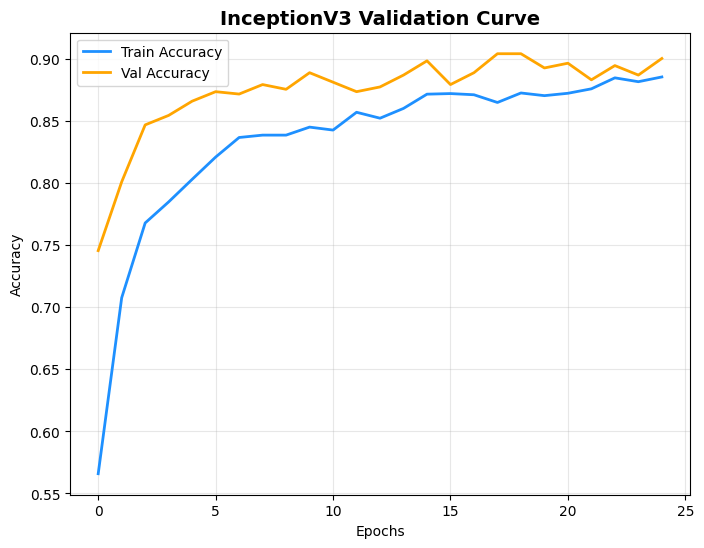

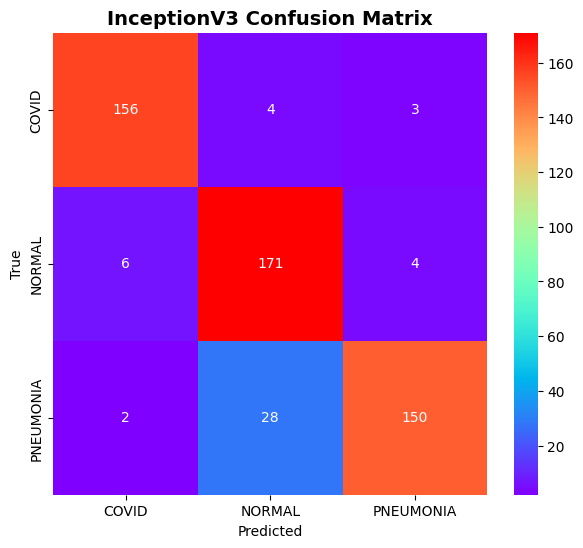

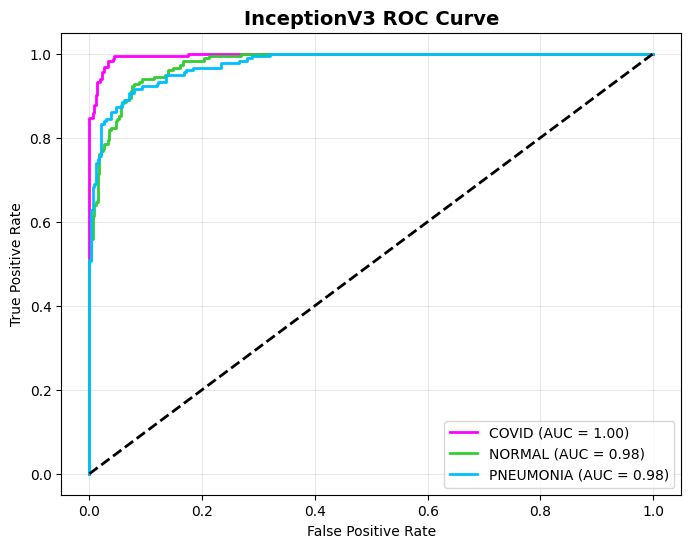

💾 Model saved as inceptionv3_model.h5


In [4]:
# ===============================
# 🧠 InceptionV3 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
inceptionv3_train_dir = 'processed_dataset/train'
inceptionv3_val_dir = 'processed_dataset/val'
inceptionv3_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
inceptionv3_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

inceptionv3_datagen_val = ImageDataGenerator(rescale=1./255)
inceptionv3_datagen_test = ImageDataGenerator(rescale=1./255)

inceptionv3_train_gen = inceptionv3_datagen_train.flow_from_directory(
    inceptionv3_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

inceptionv3_val_gen = inceptionv3_datagen_val.flow_from_directory(
    inceptionv3_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

inceptionv3_test_gen = inceptionv3_datagen_test.flow_from_directory(
    inceptionv3_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in inceptionv3_base.layers:
    layer.trainable = False

x = inceptionv3_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
inceptionv3_predictions = Dense(3, activation='softmax')(x)

inceptionv3_model = Model(inputs=inceptionv3_base.input, outputs=inceptionv3_predictions)

inceptionv3_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
inceptionv3_history = inceptionv3_model.fit(
    inceptionv3_train_gen,
    validation_data=inceptionv3_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
inceptionv3_test_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(inceptionv3_test_gen)
print(f"\n✅ InceptionV3 Test Accuracy: {inceptionv3_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
inceptionv3_y_pred_probs = inceptionv3_model.predict(inceptionv3_test_gen)
inceptionv3_y_pred = np.argmax(inceptionv3_y_pred_probs, axis=1)
inceptionv3_y_true = inceptionv3_test_gen.classes
inceptionv3_class_labels = list(inceptionv3_test_gen.class_indices.keys())

# Compute precision, recall, f1
inceptionv3_precision, inceptionv3_recall, inceptionv3_f1, _ = precision_recall_fscore_support(
    inceptionv3_y_true, inceptionv3_y_pred, average='weighted'
)

print(f"🧾 Precision: {inceptionv3_precision:.4f}")
print(f"🧾 Recall: {inceptionv3_recall:.4f}")
print(f"🧾 F1-score: {inceptionv3_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(inceptionv3_history.history['accuracy'], label='Train Accuracy', color='dodgerblue', linewidth=2)
plt.plot(inceptionv3_history.history['val_accuracy'], label='Val Accuracy', color='orange', linewidth=2)
plt.title("InceptionV3 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix
# ------------------------------
inceptionv3_cm = confusion_matrix(inceptionv3_y_true, inceptionv3_y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(inceptionv3_cm, annot=True, fmt='d', cmap='rainbow',
            xticklabels=inceptionv3_class_labels, yticklabels=inceptionv3_class_labels)
plt.title("InceptionV3 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
from sklearn.preprocessing import label_binarize
n_classes = len(inceptionv3_class_labels)
inceptionv3_y_true_bin = label_binarize(inceptionv3_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['magenta', 'limegreen', 'deepskyblue']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(inceptionv3_y_true_bin[:, i], inceptionv3_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{inceptionv3_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("InceptionV3 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
inceptionv3_model.save("inceptionv3_model.h5")
print("💾 Model saved as inceptionv3_model.h5")


*Xception*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1375s 10s/step - accuracy: 0.5484 - loss: 0.9254 - val_accuracy: 0.7610 - val_loss: 0.6980
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1072s 8s/step - accuracy: 0.7797 - loss: 0.6143 - val_accuracy: 0.8164 - val_loss: 0.5298
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 946s 7s/step - accuracy: 0.8264 - loss: 0.4937 - val_accuracy: 0.8489 - val_loss: 0.4489
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 906s 7s/step - accuracy: 0.8412 - loss: 0.4373 - val_accuracy: 0.8566 - val_loss: 0.4096
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 919s 7s/step - accuracy: 0.8527 - loss: 0.4049 - val_accuracy: 0.8662 - val_loss: 0.3740
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 939s 7s/step - accuracy: 0.8615 - loss: 0.3731 - val_accuracy: 0.8738 - val_loss: 0.3516
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 968s 7s/step - accuracy: 0.8701 - loss: 0.3546 - val_accuracy: 0.8700 - val_loss: 0.3405
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 923s 7s/step - accuracy: 0.8694 - loss: 0.3439 - val_a

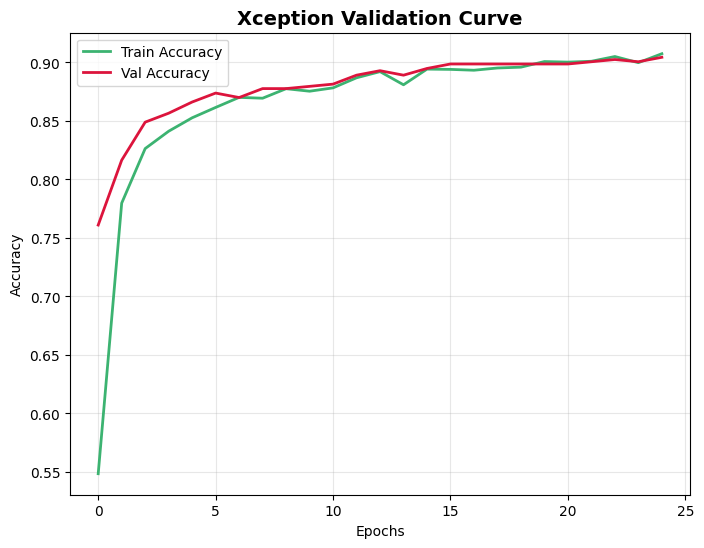

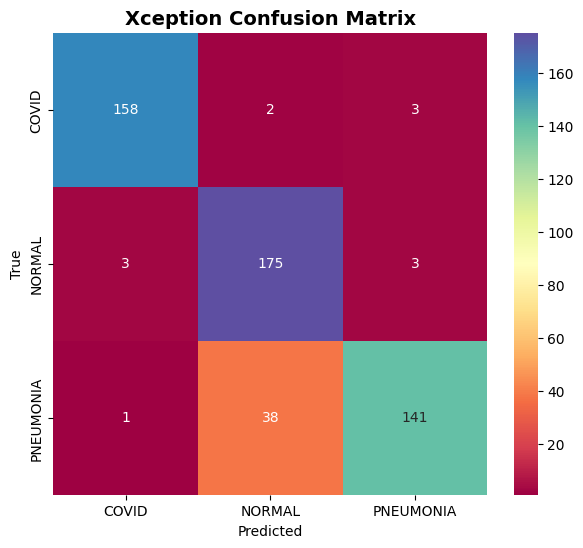

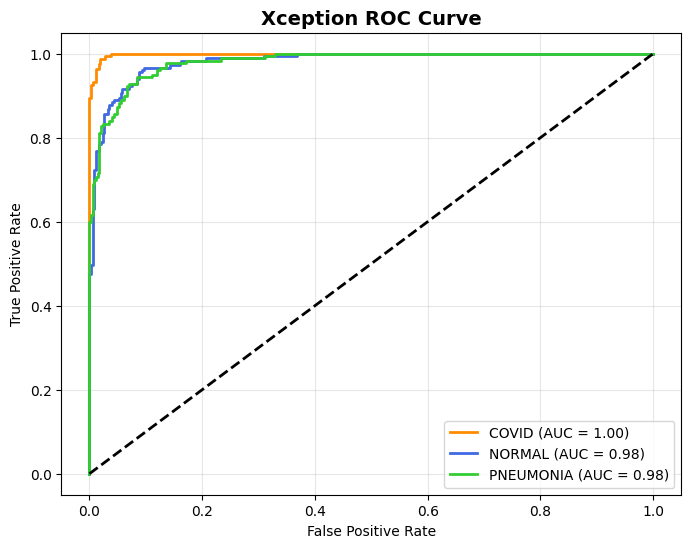

💾 Model saved as xception_model.h5


In [5]:
# ===============================
# 🧠 Xception Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
xception_train_dir = 'processed_dataset/train'
xception_val_dir = 'processed_dataset/val'
xception_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
xception_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

xception_datagen_val = ImageDataGenerator(rescale=1./255)
xception_datagen_test = ImageDataGenerator(rescale=1./255)

xception_train_gen = xception_datagen_train.flow_from_directory(
    xception_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

xception_val_gen = xception_datagen_val.flow_from_directory(
    xception_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

xception_test_gen = xception_datagen_test.flow_from_directory(
    xception_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in xception_base.layers:
    layer.trainable = False

x = xception_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
xception_predictions = Dense(3, activation='softmax')(x)

xception_model = Model(inputs=xception_base.input, outputs=xception_predictions)

xception_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
xception_history = xception_model.fit(
    xception_train_gen,
    validation_data=xception_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
xception_test_loss, xception_accuracy = xception_model.evaluate(xception_test_gen)
print(f"\n✅ Xception Test Accuracy: {xception_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
xception_y_pred_probs = xception_model.predict(xception_test_gen)
xception_y_pred = np.argmax(xception_y_pred_probs, axis=1)
xception_y_true = xception_test_gen.classes
xception_class_labels = list(xception_test_gen.class_indices.keys())

# Compute precision, recall, f1
xception_precision, xception_recall, xception_f1, _ = precision_recall_fscore_support(
    xception_y_true, xception_y_pred, average='weighted'
)

print(f"🧾 Precision: {xception_precision:.4f}")
print(f"🧾 Recall: {xception_recall:.4f}")
print(f"🧾 F1-score: {xception_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(xception_history.history['accuracy'], label='Train Accuracy', color='mediumseagreen', linewidth=2)
plt.plot(xception_history.history['val_accuracy'], label='Val Accuracy', color='crimson', linewidth=2)
plt.title("Xception Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix
# ------------------------------
xception_cm = confusion_matrix(xception_y_true, xception_y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(xception_cm, annot=True, fmt='d', cmap='Spectral',
            xticklabels=xception_class_labels, yticklabels=xception_class_labels)
plt.title("Xception Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
from sklearn.preprocessing import label_binarize
n_classes = len(xception_class_labels)
xception_y_true_bin = label_binarize(xception_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(xception_y_true_bin[:, i], xception_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{xception_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Xception ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
xception_model.save("xception_model.h5")
print("💾 Model saved as xception_model.h5")


*DenseNet121*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 632s 5s/step - accuracy: 0.3698 - loss: 1.3709 - val_accuracy: 0.5736 - val_loss: 0.9414
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 608s 5s/step - accuracy: 0.5226 - loss: 1.0100 - val_accuracy: 0.7591 - val_loss: 0.7200
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 712s 5s/step - accuracy: 0.6159 - loss: 0.8407 - val_accuracy: 0.8107 - val_loss: 0.6013
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 688s 5s/step - accuracy: 0.6986 - loss: 0.6936 - val_accuracy: 0.8432 - val_loss: 0.5209
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 713s 5s/step - accuracy: 0.7309 - loss: 0.6372 - val_accuracy: 0.8566 - val_loss: 0.4616
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 711s 5s/step - accuracy: 0.7670 - loss: 0.5561 - val_accuracy: 0.8853 - val_loss: 0.4130
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 703s 5s/step - accuracy: 0.7867 - loss: 0.5228 - val_accuracy: 0.8872 - val_loss: 0.3852
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 641s 5s/step - accuracy: 0.8151 - loss: 0.4790 - val_accu

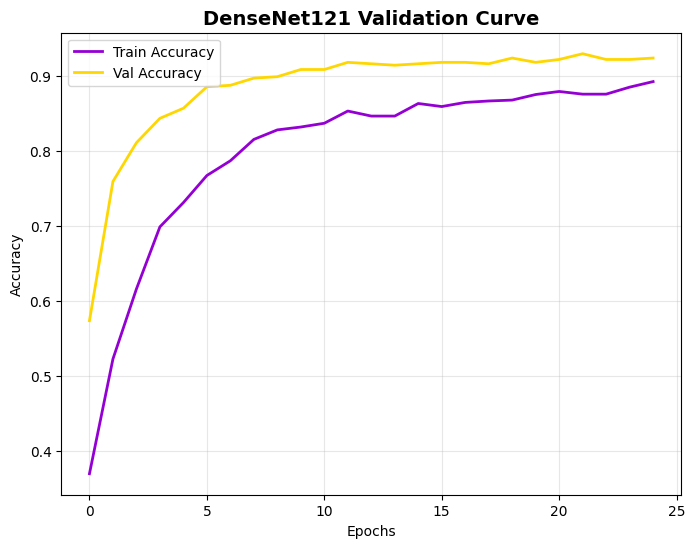

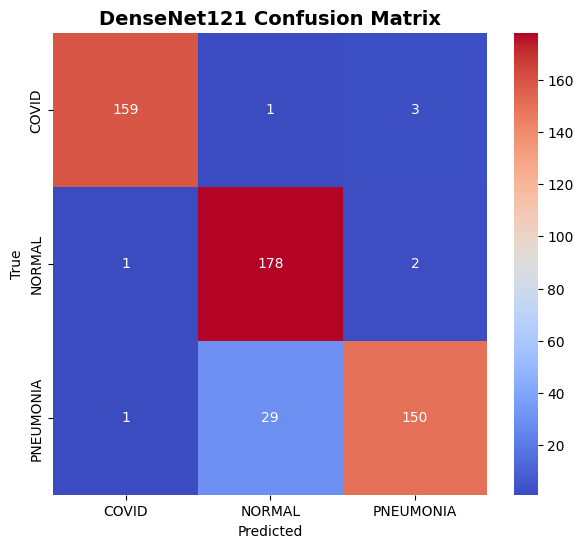

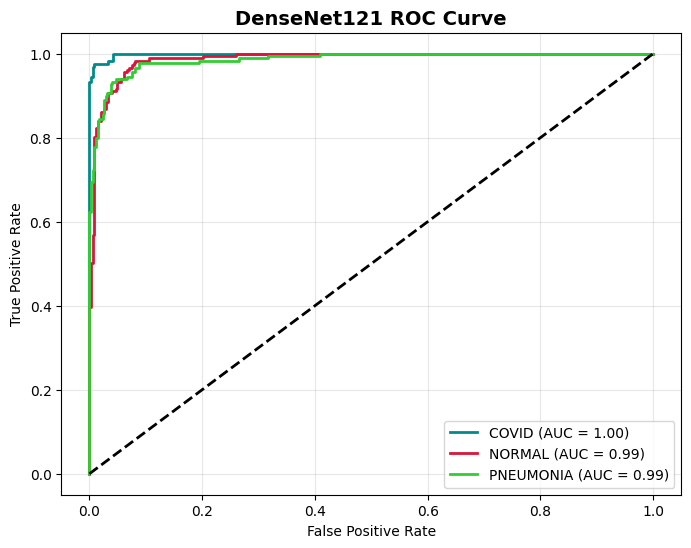

💾 Model saved as densenet121_model.h5


In [1]:
# ===============================
# 🧠 DenseNet121 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
densenet_train_dir = 'processed_dataset/train'
densenet_val_dir = 'processed_dataset/val'
densenet_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
densenet_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

densenet_datagen_val = ImageDataGenerator(rescale=1./255)
densenet_datagen_test = ImageDataGenerator(rescale=1./255)

densenet_train_gen = densenet_datagen_train.flow_from_directory(
    densenet_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet_val_gen = densenet_datagen_val.flow_from_directory(
    densenet_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet_test_gen = densenet_datagen_test.flow_from_directory(
    densenet_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in densenet_base.layers:
    layer.trainable = False

x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
densenet_predictions = Dense(3, activation='softmax')(x)

densenet_model = Model(inputs=densenet_base.input, outputs=densenet_predictions)

densenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
densenet_history = densenet_model.fit(
    densenet_train_gen,
    validation_data=densenet_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
densenet_test_loss, densenet_accuracy = densenet_model.evaluate(densenet_test_gen)
print(f"\n✅ DenseNet121 Test Accuracy: {densenet_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
densenet_y_pred_probs = densenet_model.predict(densenet_test_gen)
densenet_y_pred = np.argmax(densenet_y_pred_probs, axis=1)
densenet_y_true = densenet_test_gen.classes
densenet_class_labels = list(densenet_test_gen.class_indices.keys())

# Compute precision, recall, f1
densenet_precision, densenet_recall, densenet_f1, _ = precision_recall_fscore_support(
    densenet_y_true, densenet_y_pred, average='weighted'
)

print(f"🧾 Precision: {densenet_precision:.4f}")
print(f"🧾 Recall: {densenet_recall:.4f}")
print(f"🧾 F1-score: {densenet_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(densenet_history.history['accuracy'], label='Train Accuracy', color='darkviolet', linewidth=2)
plt.plot(densenet_history.history['val_accuracy'], label='Val Accuracy', color='gold', linewidth=2)
plt.title("DenseNet121 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix
# ------------------------------
densenet_cm = confusion_matrix(densenet_y_true, densenet_y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(densenet_cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=densenet_class_labels, yticklabels=densenet_class_labels)
plt.title("DenseNet121 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
from sklearn.preprocessing import label_binarize
n_classes = len(densenet_class_labels)
densenet_y_true_bin = label_binarize(densenet_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkcyan', 'crimson', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(densenet_y_true_bin[:, i], densenet_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{densenet_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("DenseNet121 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Sav3e Model
# ------------------------------
densenet_model.save("densenet121_model.h5")
print("💾 Model saved as densenet121_model.h5")



*ResNet50*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 511s 4s/step - accuracy: 0.3351 - loss: 1.3439 - val_accuracy: 0.6157 - val_loss: 1.0563
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 489s 4s/step - accuracy: 0.3681 - loss: 1.2153 - val_accuracy: 0.5927 - val_loss: 1.0187
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.3973 - loss: 1.1518 - val_accuracy: 0.6692 - val_loss: 0.9863
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 524s 4s/step - accuracy: 0.4018 - loss: 1.1199 - val_accuracy: 0.6902 - val_loss: 0.9559
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 527s 4s/step - accuracy: 0.4351 - loss: 1.0611 - val_accuracy: 0.7629 - val_loss: 0.9293
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 522s 4s/step - accuracy: 0.4937 - loss: 0.9955 - val_accuracy: 0.6826 - val_loss: 0.9099
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 523s 4s/step - accuracy: 0.4872 - loss: 0.9936 - val_accuracy: 0.7075 - val_loss: 0.8917
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 528s 4s/step - accuracy: 0.5374 - loss: 0.9516 - val_accu

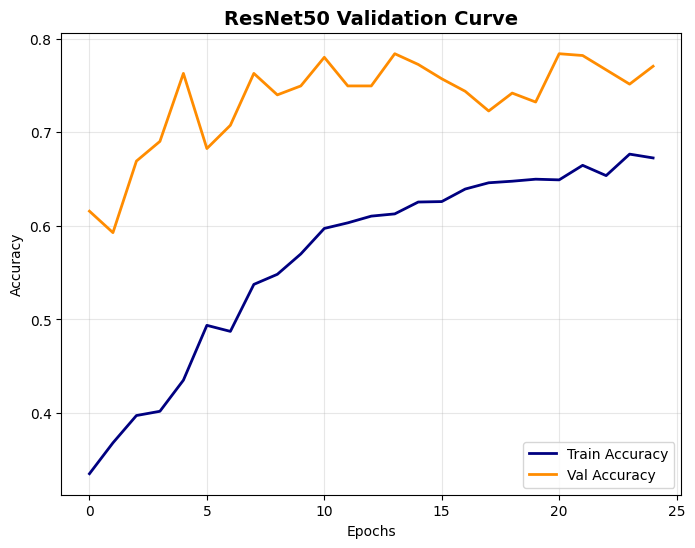

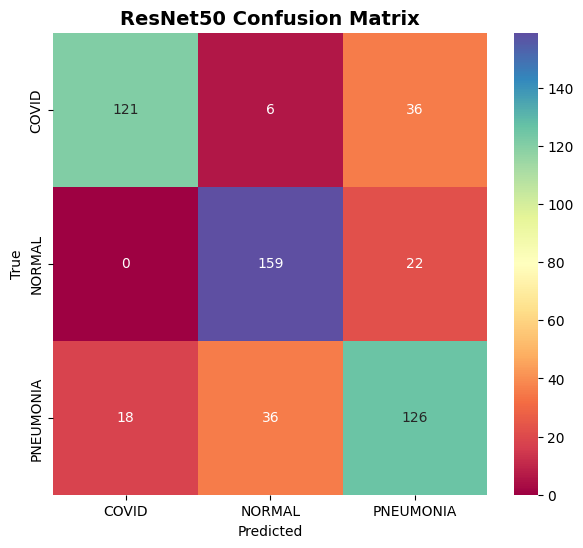

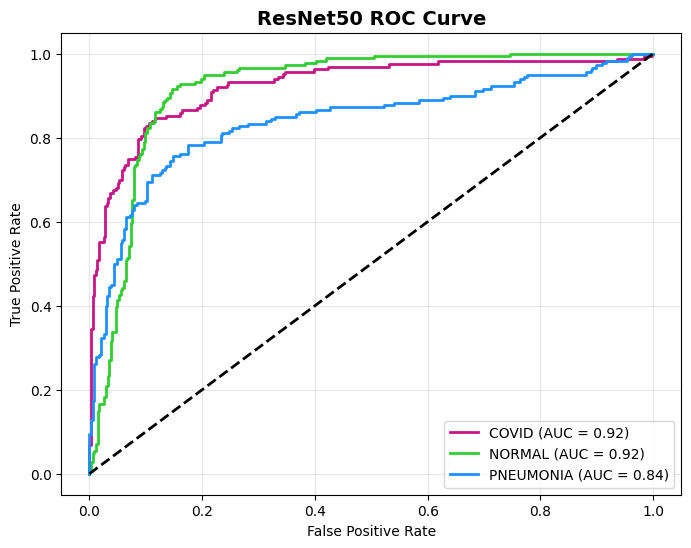

💾 Model saved as resnet50_model.h5


In [2]:
# ===============================
# 🧠 ResNet50 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
resnet50_train_dir = 'processed_dataset/train'
resnet50_val_dir = 'processed_dataset/val'
resnet50_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
resnet50_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

resnet50_datagen_val = ImageDataGenerator(rescale=1./255)
resnet50_datagen_test = ImageDataGenerator(rescale=1./255)

resnet50_train_gen = resnet50_datagen_train.flow_from_directory(
    resnet50_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

resnet50_val_gen = resnet50_datagen_val.flow_from_directory(
    resnet50_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

resnet50_test_gen = resnet50_datagen_test.flow_from_directory(
    resnet50_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet50_base.layers:
    layer.trainable = False

x = resnet50_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
resnet50_predictions = Dense(3, activation='softmax')(x)

resnet50_model = Model(inputs=resnet50_base.input, outputs=resnet50_predictions)

resnet50_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
resnet50_history = resnet50_model.fit(
    resnet50_train_gen,
    validation_data=resnet50_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
resnet50_test_loss, resnet50_accuracy = resnet50_model.evaluate(resnet50_test_gen)
print(f"\n✅ ResNet50 Test Accuracy: {resnet50_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
resnet50_y_pred_probs = resnet50_model.predict(resnet50_test_gen)
resnet50_y_pred = np.argmax(resnet50_y_pred_probs, axis=1)
resnet50_y_true = resnet50_test_gen.classes
resnet50_class_labels = list(resnet50_test_gen.class_indices.keys())

# Compute precision, recall, f1
resnet50_precision, resnet50_recall, resnet50_f1, _ = precision_recall_fscore_support(
    resnet50_y_true, resnet50_y_pred, average='weighted'
)

print(f"🧾 Precision: {resnet50_precision:.4f}")
print(f"🧾 Recall: {resnet50_recall:.4f}")
print(f"🧾 F1-score: {resnet50_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(resnet50_history.history['accuracy'], label='Train Accuracy', color='navy', linewidth=2)
plt.plot(resnet50_history.history['val_accuracy'], label='Val Accuracy', color='darkorange', linewidth=2)
plt.title("ResNet50 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix
# ------------------------------
resnet50_cm = confusion_matrix(resnet50_y_true, resnet50_y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(resnet50_cm, annot=True, fmt='d', cmap='Spectral',
            xticklabels=resnet50_class_labels, yticklabels=resnet50_class_labels)
plt.title("ResNet50 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
from sklearn.preprocessing import label_binarize
n_classes = len(resnet50_class_labels)
resnet50_y_true_bin = label_binarize(resnet50_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['mediumvioletred', 'limegreen', 'dodgerblue']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(resnet50_y_true_bin[:, i], resnet50_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{resnet50_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ResNet50 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
resnet50_model.save("resnet50_model.h5")
print("💾 Model saved as resnet50_model.h5")


*DenseNet169*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1001s 7s/step - accuracy: 0.5140 - loss: 0.9978 - val_accuracy: 0.7266 - val_loss: 0.6728
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 810s 6s/step - accuracy: 0.6864 - loss: 0.7100 - val_accuracy: 0.8184 - val_loss: 0.4964
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 707s 5s/step - accuracy: 0.7687 - loss: 0.5631 - val_accuracy: 0.8413 - val_loss: 0.4273
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 721s 6s/step - accuracy: 0.8213 - loss: 0.4707 - val_accuracy: 0.8394 - val_loss: 0.3956
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 723s 6s/step - accuracy: 0.8364 - loss: 0.4289 - val_accuracy: 0.8815 - val_loss: 0.3381
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 722s 6s/step - accuracy: 0.8570 - loss: 0.3902 - val_accuracy: 0.8834 - val_loss: 0.3213
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 757s 6s/step - accuracy: 0.8694 - loss: 0.3582 - val_accuracy: 0.8853 - val_loss: 0.3032
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 767s 6s/step - accuracy: 0.8732 - loss: 0.3405 - val_acc

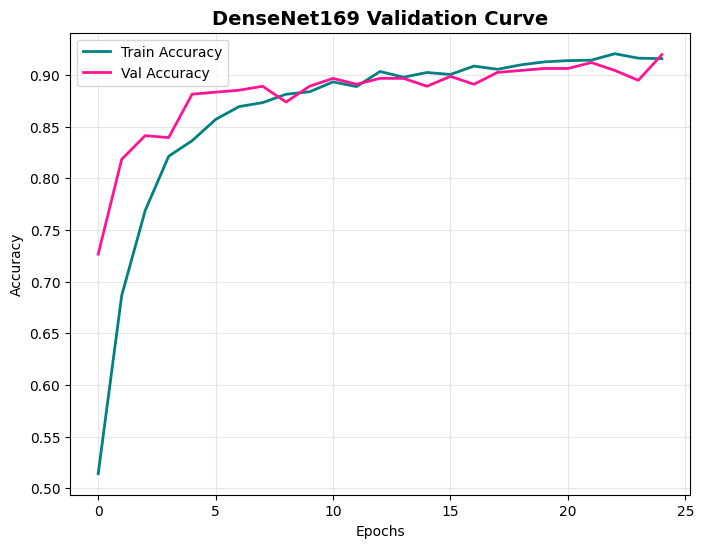

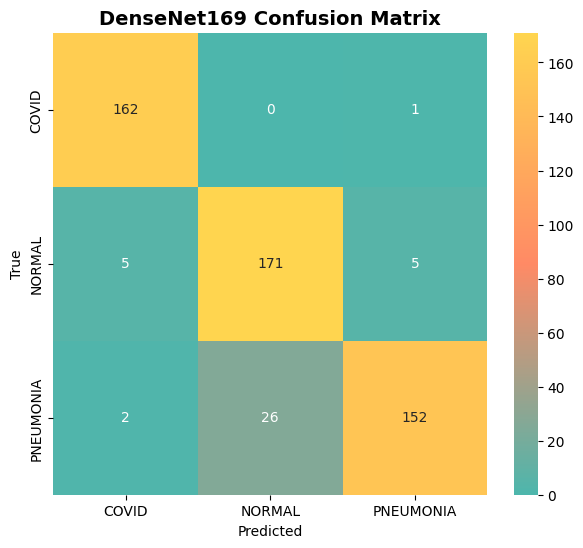

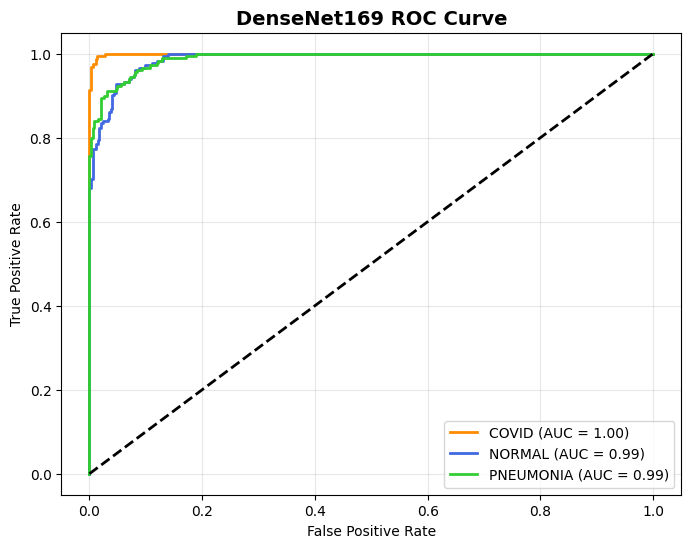

💾 Model saved as densenet169_model.h5


In [1]:
# ===============================
# 🧠 DenseNet169 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.colors import LinearSegmentedColormap

# ------------------------------
# ⚙️ Paths
# ------------------------------
densenet169_train_dir = 'processed_dataset/train'
densenet169_val_dir = 'processed_dataset/val'
densenet169_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
densenet169_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

densenet169_datagen_val = ImageDataGenerator(rescale=1./255)
densenet169_datagen_test = ImageDataGenerator(rescale=1./255)

densenet169_train_gen = densenet169_datagen_train.flow_from_directory(
    densenet169_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet169_val_gen = densenet169_datagen_val.flow_from_directory(
    densenet169_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet169_test_gen = densenet169_datagen_test.flow_from_directory(
    densenet169_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
densenet169_base = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in densenet169_base.layers:
    layer.trainable = False

x = densenet169_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
densenet169_predictions = Dense(3, activation='softmax')(x)

densenet169_model = Model(inputs=densenet169_base.input, outputs=densenet169_predictions)

densenet169_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
densenet169_history = densenet169_model.fit(
    densenet169_train_gen,
    validation_data=densenet169_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
densenet169_test_loss, densenet169_accuracy = densenet169_model.evaluate(densenet169_test_gen)
print(f"\n✅ DenseNet169 Test Accuracy: {densenet169_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
densenet169_y_pred_probs = densenet169_model.predict(densenet169_test_gen)
densenet169_y_pred = np.argmax(densenet169_y_pred_probs, axis=1)
densenet169_y_true = densenet169_test_gen.classes
densenet169_class_labels = list(densenet169_test_gen.class_indices.keys())

# Compute precision, recall, f1
densenet169_precision, densenet169_recall, densenet169_f1, _ = precision_recall_fscore_support(
    densenet169_y_true, densenet169_y_pred, average='weighted'
)

print(f"🧾 Precision: {densenet169_precision:.4f}")
print(f"🧾 Recall: {densenet169_recall:.4f}")
print(f"🧾 F1-score: {densenet169_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(densenet169_history.history['accuracy'], label='Train Accuracy', color='teal', linewidth=2)
plt.plot(densenet169_history.history['val_accuracy'], label='Val Accuracy', color='deeppink', linewidth=2)
plt.title("DenseNet169 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
densenet169_cm = confusion_matrix(densenet169_y_true, densenet169_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(densenet169_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=densenet169_class_labels, yticklabels=densenet169_class_labels)
plt.title("DenseNet169 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(densenet169_class_labels)
densenet169_y_true_bin = label_binarize(densenet169_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(densenet169_y_true_bin[:, i], densenet169_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{densenet169_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("DenseNet169 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------

densenet169_model.save("densenet169_model.h5")
print("💾 Model saved as densenet169_model.h5")


*DenseNet201*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 56s 1us/step


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 922s 7s/step - accuracy: 0.4621 - loss: 1.0799 - val_accuracy: 0.7075 - val_loss: 0.7423
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 879s 7s/step - accuracy: 0.6881 - loss: 0.7225 - val_accuracy: 0.8757 - val_loss: 0.5357
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 878s 7s/step - accuracy: 0.7809 - loss: 0.5647 - val_accuracy: 0.8929 - val_loss: 0.4346
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 900s 7s/step - accuracy: 0.8127 - loss: 0.4889 - val_accuracy: 0.8967 - val_loss: 0.3734
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 913s 7s/step - accuracy: 0.8479 - loss: 0.4293 - val_accuracy: 0.9006 - val_loss: 0.3351
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 897s 7s/step - accuracy: 0.8584 - loss: 0.3944 - val_accuracy: 0.9101 - val_loss: 0.3079
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 902s 7s/step - accuracy: 0.8687 - loss: 0.3717 - val_accuracy: 0.9178 - val_loss: 0.2848
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 885s 7s/step - accuracy: 0.8785 - loss: 0.3469 - val_accu

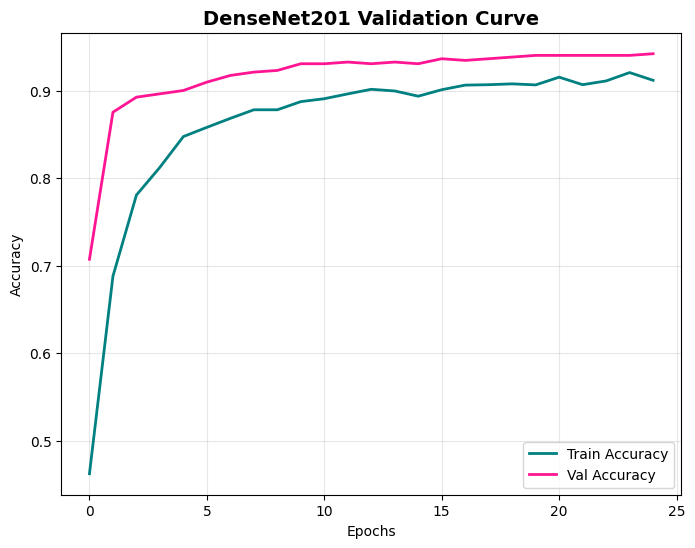

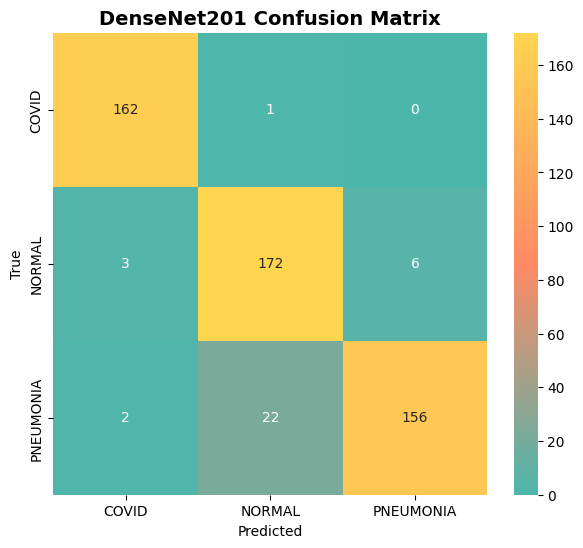

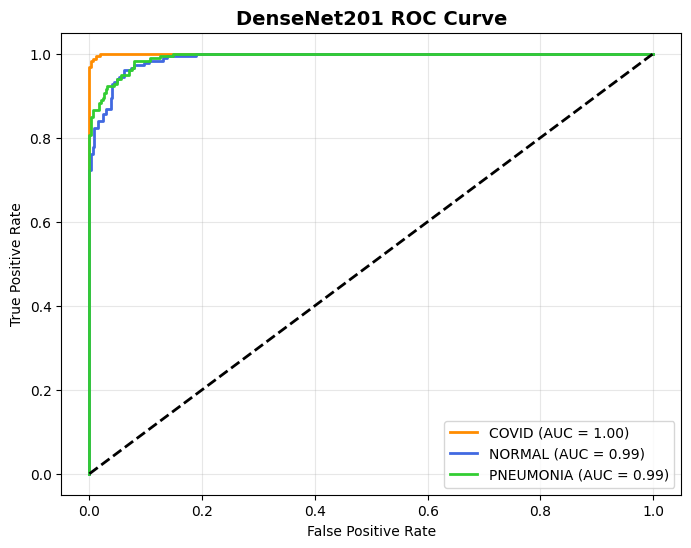

💾 Model saved as densenet201_model.h5


In [2]:
# ===============================
# 🧠 DenseNet201 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.colors import LinearSegmentedColormap

# ------------------------------
# ⚙️ Paths
# ------------------------------
densenet201_train_dir = 'processed_dataset/train'
densenet201_val_dir = 'processed_dataset/val'
densenet201_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
densenet201_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

densenet201_datagen_val = ImageDataGenerator(rescale=1./255)
densenet201_datagen_test = ImageDataGenerator(rescale=1./255)

densenet201_train_gen = densenet201_datagen_train.flow_from_directory(
    densenet201_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet201_val_gen = densenet201_datagen_val.flow_from_directory(
    densenet201_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

densenet201_test_gen = densenet201_datagen_test.flow_from_directory(
    densenet201_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
densenet201_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in densenet201_base.layers:
    layer.trainable = False

x = densenet201_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
densenet201_predictions = Dense(3, activation='softmax')(x)

densenet201_model = Model(inputs=densenet201_base.input, outputs=densenet201_predictions)

densenet201_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
densenet201_history = densenet201_model.fit(
    densenet201_train_gen,
    validation_data=densenet201_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
densenet201_test_loss, densenet201_accuracy = densenet201_model.evaluate(densenet201_test_gen)
print(f"\n✅ DenseNet201 Test Accuracy: {densenet201_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
densenet201_y_pred_probs = densenet201_model.predict(densenet201_test_gen)
densenet201_y_pred = np.argmax(densenet201_y_pred_probs, axis=1)
densenet201_y_true = densenet201_test_gen.classes
densenet201_class_labels = list(densenet201_test_gen.class_indices.keys())

# Compute precision, recall, f1
densenet201_precision, densenet201_recall, densenet201_f1, _ = precision_recall_fscore_support(
    densenet201_y_true, densenet201_y_pred, average='weighted'
)

print(f"🧾 Precision: {densenet201_precision:.4f}")
print(f"🧾 Recall: {densenet201_recall:.4f}")
print(f"🧾 F1-score: {densenet201_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(densenet201_history.history['accuracy'], label='Train Accuracy', color='teal', linewidth=2)
plt.plot(densenet201_history.history['val_accuracy'], label='Val Accuracy', color='deeppink', linewidth=2)
plt.title("DenseNet201 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
densenet201_cm = confusion_matrix(densenet201_y_true, densenet201_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(densenet201_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=densenet201_class_labels, yticklabels=densenet201_class_labels)
plt.title("DenseNet201 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(densenet201_class_labels)
densenet201_y_true_bin = label_binarize(densenet201_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(densenet201_y_true_bin[:, i], densenet201_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{densenet201_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("DenseNet201 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
densenet201_model.save("densenet201_model.h5")
print("💾 Model saved as densenet201_model.h5")


*VGG16*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1576s 12s/step - accuracy: 0.8751 - loss: 0.3366 - val_accuracy: 0.8929 - val_loss: 0.2685
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1025s 8s/step - accuracy: 0.9285 - loss: 0.1997 - val_accuracy: 0.9407 - val_loss: 0.1638
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1042s 8s/step - accuracy: 0.9438 - loss: 0.1634 - val_accuracy: 0.9312 - val_loss: 0.2038
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1020s 8s/step - accuracy: 0.9409 - loss: 0.1678 - val_accuracy: 0.9598 - val_loss: 0.1174
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1010s 8s/step - accuracy: 0.9483 - loss: 0.1465 - val_accuracy: 0.9503 - val_loss: 0.1696
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1000s 8s/step - accuracy: 0.9510 - loss: 0.1349 - val_accuracy: 0.9618 - val_loss: 0.1186
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1004s 8s/step - accuracy: 0.9531 - loss: 0.1331 - val_accuracy: 0.9465 - val_loss: 0.1496
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 1008s 8s/step - accuracy: 0.9603 - loss: 0.1153 -

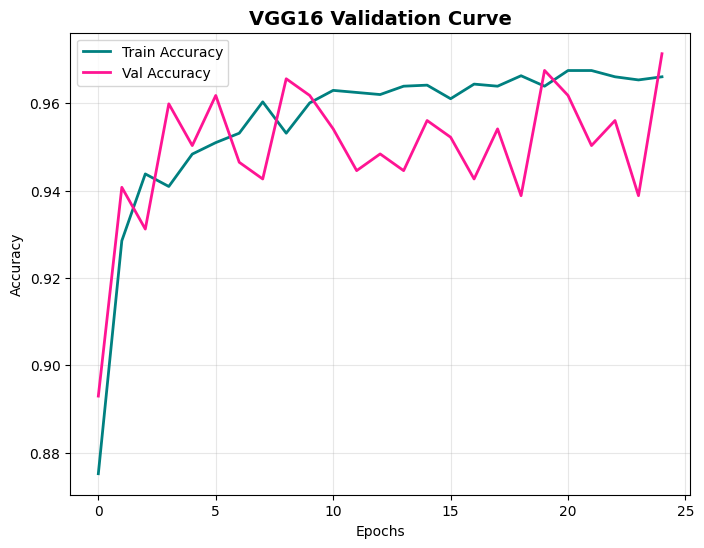

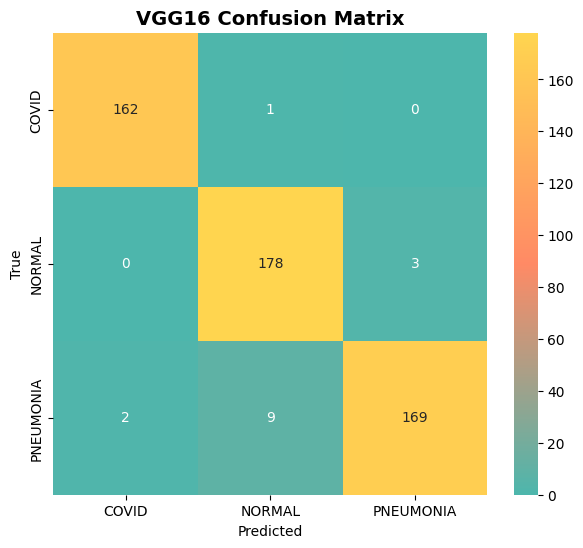

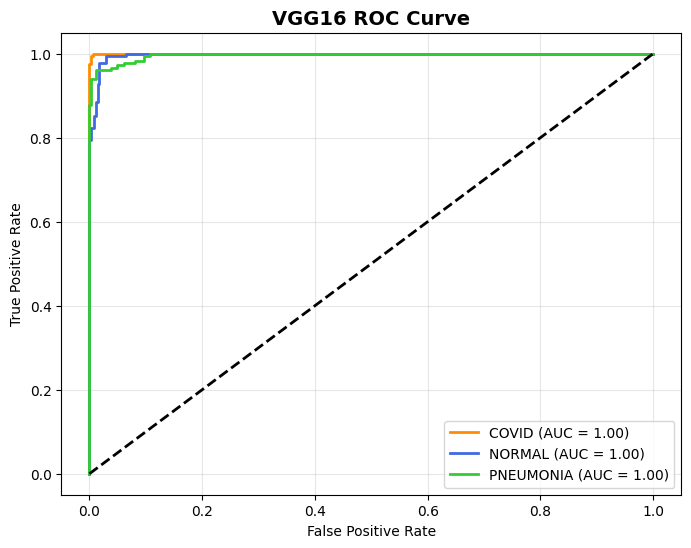

💾 Model saved as vgg16_model.h5


In [1]:
# ===============================
# 🧠 VGG16 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
vgg16_train_dir = 'processed_dataset/train'
vgg16_val_dir = 'processed_dataset/val'
vgg16_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
vgg16_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

vgg16_datagen_val = ImageDataGenerator(rescale=1./255)
vgg16_datagen_test = ImageDataGenerator(rescale=1./255)

vgg16_train_gen = vgg16_datagen_train.flow_from_directory(
    vgg16_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

vgg16_val_gen = vgg16_datagen_val.flow_from_directory(
    vgg16_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

vgg16_test_gen = vgg16_datagen_test.flow_from_directory(
    vgg16_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze convolutional base
for layer in vgg16_base.layers:
    layer.trainable = False

x = vgg16_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
vgg16_predictions = Dense(3, activation='softmax')(x)

vgg16_model = Model(inputs=vgg16_base.input, outputs=vgg16_predictions)

vgg16_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
vgg16_history = vgg16_model.fit(
    vgg16_train_gen,
    validation_data=vgg16_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
vgg16_test_loss, vgg16_accuracy = vgg16_model.evaluate(vgg16_test_gen)
print(f"\n✅ VGG16 Test Accuracy: {vgg16_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
vgg16_y_pred_probs = vgg16_model.predict(vgg16_test_gen)
vgg16_y_pred = np.argmax(vgg16_y_pred_probs, axis=1)
vgg16_y_true = vgg16_test_gen.classes
vgg16_class_labels = list(vgg16_test_gen.class_indices.keys())

# Compute precision, recall, f1
vgg16_precision, vgg16_recall, vgg16_f1, _ = precision_recall_fscore_support(
    vgg16_y_true, vgg16_y_pred, average='weighted'
)

print(f"🧾 Precision: {vgg16_precision:.4f}")
print(f"🧾 Recall: {vgg16_recall:.4f}")
print(f"🧾 F1-score: {vgg16_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(vgg16_history.history['accuracy'], label='Train Accuracy', color='teal', linewidth=2)
plt.plot(vgg16_history.history['val_accuracy'], label='Val Accuracy', color='deeppink', linewidth=2)
plt.title("VGG16 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
vgg16_cm = confusion_matrix(vgg16_y_true, vgg16_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(vgg16_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=vgg16_class_labels, yticklabels=vgg16_class_labels)
plt.title("VGG16 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(vgg16_class_labels)
vgg16_y_true_bin = label_binarize(vgg16_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(vgg16_y_true_bin[:, i], vgg16_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{vgg16_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("VGG16 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
vgg16_model.save("vgg16_model.h5")
print("💾 Model saved as vgg16_model.h5")


*MobileNetV2*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


C:\Users\sirin\AppData\Local\Temp\ipykernel_31160\560675951.py:65: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.7548 - loss: 0.5579 - val_accuracy: 0.9082 - val_loss: 0.2994
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8914 - loss: 0.2955 - val_accuracy: 0.9312 - val_loss: 0.2306
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9168 - loss: 0.2365 - val_accuracy: 0.9331 - val_loss: 0.2029
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9268 - loss: 0.2135 - val_accuracy: 0.9312 - val_loss: 0.1941
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9235 - loss: 0.2047 - val_accuracy: 0.9465 - val_loss: 0.1722
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9337 - loss: 0.2005 - val_accuracy: 0.9446 - val_loss: 0.1682
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9385 - loss: 0.1787 - val_accuracy: 0.9484 - val_loss: 0.1586
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9419 - loss: 0.1731 - val_accu

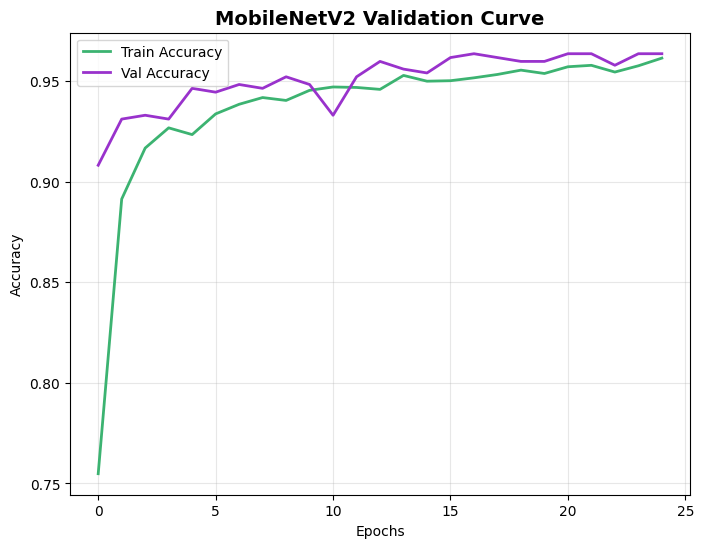

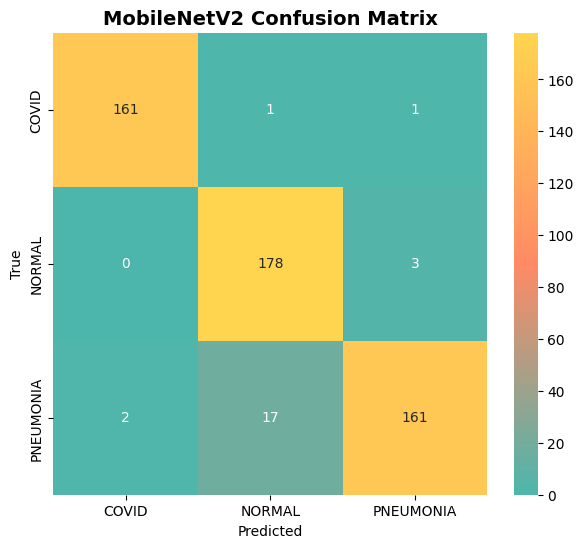

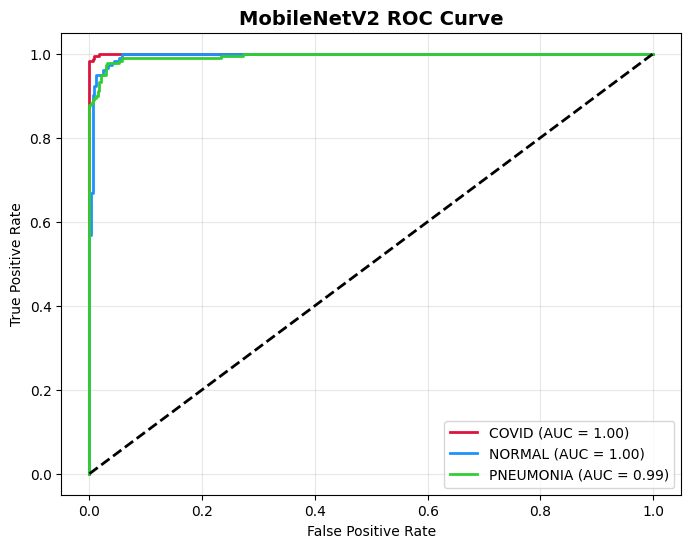

💾 Model saved as mobilenetv2_model.h5


In [2]:
# ===============================
# 📱 MobileNetV2 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
mobilenet_train_dir = 'processed_dataset/train'
mobilenet_val_dir = 'processed_dataset/val'
mobilenet_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
mobilenet_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

mobilenet_datagen_val = ImageDataGenerator(rescale=1./255)
mobilenet_datagen_test = ImageDataGenerator(rescale=1./255)

mobilenet_train_gen = mobilenet_datagen_train.flow_from_directory(
    mobilenet_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

mobilenet_val_gen = mobilenet_datagen_val.flow_from_directory(
    mobilenet_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

mobilenet_test_gen = mobilenet_datagen_test.flow_from_directory(
    mobilenet_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze convolutional base
for layer in mobilenet_base.layers:
    layer.trainable = False

x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
mobilenet_predictions = Dense(3, activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=mobilenet_predictions)

mobilenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
mobilenet_history = mobilenet_model.fit(
    mobilenet_train_gen,
    validation_data=mobilenet_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
mobilenet_test_loss, mobilenet_accuracy = mobilenet_model.evaluate(mobilenet_test_gen)
print(f"\n✅ MobileNetV2 Test Accuracy: {mobilenet_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
mobilenet_y_pred_probs = mobilenet_model.predict(mobilenet_test_gen)
mobilenet_y_pred = np.argmax(mobilenet_y_pred_probs, axis=1)
mobilenet_y_true = mobilenet_test_gen.classes
mobilenet_class_labels = list(mobilenet_test_gen.class_indices.keys())

# Compute precision, recall, f1
mobilenet_precision, mobilenet_recall, mobilenet_f1, _ = precision_recall_fscore_support(
    mobilenet_y_true, mobilenet_y_pred, average='weighted'
)

print(f"🧾 Precision: {mobilenet_precision:.4f}")
print(f"🧾 Recall: {mobilenet_recall:.4f}")
print(f"🧾 F1-score: {mobilenet_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy', color='mediumseagreen', linewidth=2)
plt.plot(mobilenet_history.history['val_accuracy'], label='Val Accuracy', color='darkorchid', linewidth=2)
plt.title("MobileNetV2 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
mobilenet_cm = confusion_matrix(mobilenet_y_true, mobilenet_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(mobilenet_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=mobilenet_class_labels, yticklabels=mobilenet_class_labels)
plt.title("MobileNetV2 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(mobilenet_class_labels)
mobilenet_y_true_bin = label_binarize(mobilenet_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['crimson', 'dodgerblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(mobilenet_y_true_bin[:, i], mobilenet_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{mobilenet_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("MobileNetV2 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
mobilenet_model.save("mobilenetv2_model.h5")
print("💾 Model saved as mobilenetv2_model.h5")


*MobileNetV3*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\applications\mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.3545 - loss: 1.1351 - val_accuracy: 0.7075 - val_loss: 1.0270
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.4372 - loss: 1.0511 - val_accuracy: 0.6444 - val_loss: 0.9688
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.5068 - loss: 1.0001 - val_accuracy: 0.7878 - val_loss: 0.9112
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.5396 - loss: 0.9589 - val_accuracy: 0.7782 - val_loss: 0.8607
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.5982 - loss: 0.9104 - val_accuracy: 0.7763 - val_loss: 0.8248
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.6082 - loss: 0.8857 - val_accuracy: 0.6482 - val_loss: 0.7981
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.6348 - loss: 0.8537 - val_accuracy: 0.7170 - val_loss: 0.7610
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.6460 - loss: 0.8351 - val_accu

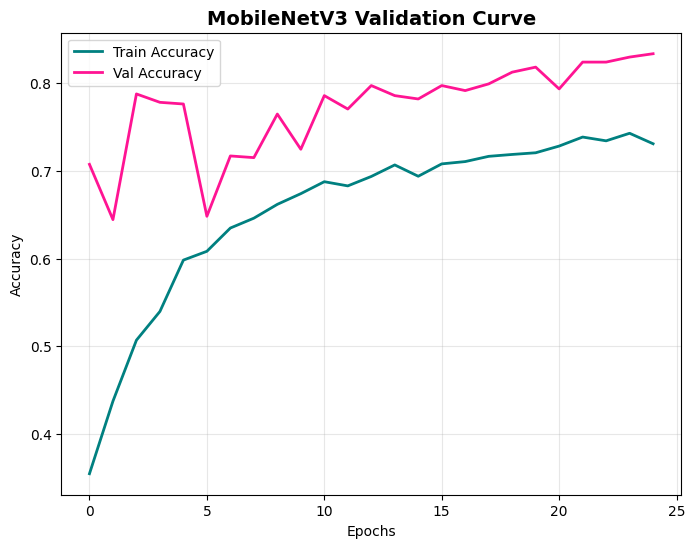

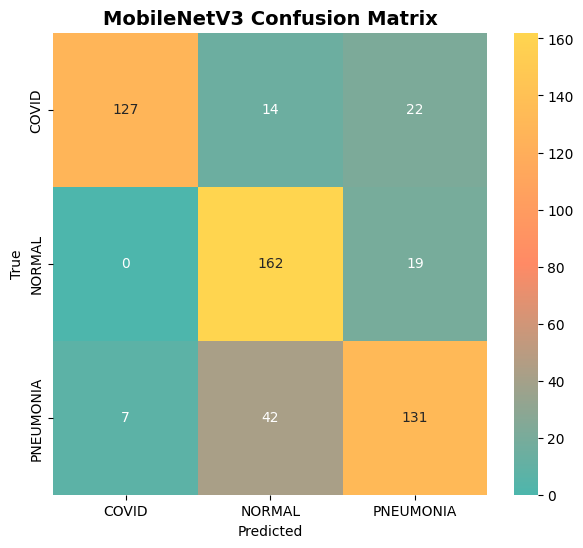

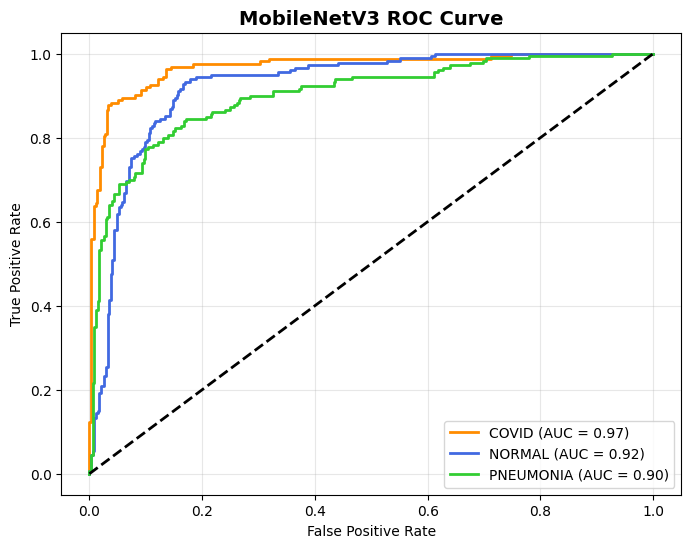

💾 Model saved as mobilenetv3_model.h5


In [3]:
# ===============================
# ⚡ MobileNetV3 Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
mobilenetv3_train_dir = 'processed_dataset/train'
mobilenetv3_val_dir = 'processed_dataset/val'
mobilenetv3_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
mobilenetv3_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

mobilenetv3_datagen_val = ImageDataGenerator(rescale=1./255)
mobilenetv3_datagen_test = ImageDataGenerator(rescale=1./255)

mobilenetv3_train_gen = mobilenetv3_datagen_train.flow_from_directory(
    mobilenetv3_train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

mobilenetv3_val_gen = mobilenetv3_datagen_val.flow_from_directory(
    mobilenetv3_val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

mobilenetv3_test_gen = mobilenetv3_datagen_test.flow_from_directory(
    mobilenetv3_test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
mobilenetv3_base = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze convolutional base
for layer in mobilenetv3_base.layers:
    layer.trainable = False

x = mobilenetv3_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
mobilenetv3_predictions = Dense(3, activation='softmax')(x)

mobilenetv3_model = Model(inputs=mobilenetv3_base.input, outputs=mobilenetv3_predictions)

mobilenetv3_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
mobilenetv3_history = mobilenetv3_model.fit(
    mobilenetv3_train_gen,
    validation_data=mobilenetv3_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
mobilenetv3_test_loss, mobilenetv3_accuracy = mobilenetv3_model.evaluate(mobilenetv3_test_gen)
print(f"\n✅ MobileNetV3 Test Accuracy: {mobilenetv3_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
mobilenetv3_y_pred_probs = mobilenetv3_model.predict(mobilenetv3_test_gen)
mobilenetv3_y_pred = np.argmax(mobilenetv3_y_pred_probs, axis=1)
mobilenetv3_y_true = mobilenetv3_test_gen.classes
mobilenetv3_class_labels = list(mobilenetv3_test_gen.class_indices.keys())

# Compute precision, recall, f1
mobilenetv3_precision, mobilenetv3_recall, mobilenetv3_f1, _ = precision_recall_fscore_support(
    mobilenetv3_y_true, mobilenetv3_y_pred, average='weighted'
)

print(f"🧾 Precision: {mobilenetv3_precision:.4f}")
print(f"🧾 Recall: {mobilenetv3_recall:.4f}")
print(f"🧾 F1-score: {mobilenetv3_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(mobilenetv3_history.history['accuracy'], label='Train Accuracy', color='teal', linewidth=2)
plt.plot(mobilenetv3_history.history['val_accuracy'], label='Val Accuracy', color='deeppink', linewidth=2)
plt.title("MobileNetV3 Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
mobilenetv3_cm = confusion_matrix(mobilenetv3_y_true, mobilenetv3_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(mobilenetv3_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=mobilenetv3_class_labels, yticklabels=mobilenetv3_class_labels)
plt.title("MobileNetV3 Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(mobilenetv3_class_labels)
mobilenetv3_y_true_bin = label_binarize(mobilenetv3_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(mobilenetv3_y_true_bin[:, i], mobilenetv3_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{mobilenetv3_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("MobileNetV3 ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
mobilenetv3_model.save("mobilenetv3_model.h5")
print("💾 Model saved as mobilenetv3_model.h5")


*NASNet*

Found 4181 images belonging to 3 classes.
Found 523 images belonging to 3 classes.
Found 524 images belonging to 3 classes.
343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 526s 2us/step


c:\Users\sirin\Desktop\mini\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2933s 22s/step - accuracy: 0.8149 - loss: 0.4730 - val_accuracy: 0.8700 - val_loss: 0.3382
Epoch 2/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2833s 22s/step - accuracy: 0.8983 - loss: 0.2963 - val_accuracy: 0.8891 - val_loss: 0.2956
Epoch 3/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2886s 22s/step - accuracy: 0.9122 - loss: 0.2451 - val_accuracy: 0.9159 - val_loss: 0.2500
Epoch 4/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2824s 22s/step - accuracy: 0.9129 - loss: 0.2359 - val_accuracy: 0.8872 - val_loss: 0.2962
Epoch 5/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2922s 22s/step - accuracy: 0.9266 - loss: 0.2211 - val_accuracy: 0.8853 - val_loss: 0.2879
Epoch 6/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2854s 22s/step - accuracy: 0.9208 - loss: 0.2118 - val_accuracy: 0.8853 - val_loss: 0.3020
Epoch 7/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2808s 21s/step - accuracy: 0.9328 - loss: 0.1908 - val_accuracy: 0.8929 - val_loss: 0.3007
Epoch 8/25
131/131 ━━━━━━━━━━━━━━━━━━━━ 2809s 21s/step - accuracy: 0.9294 - loss: 0

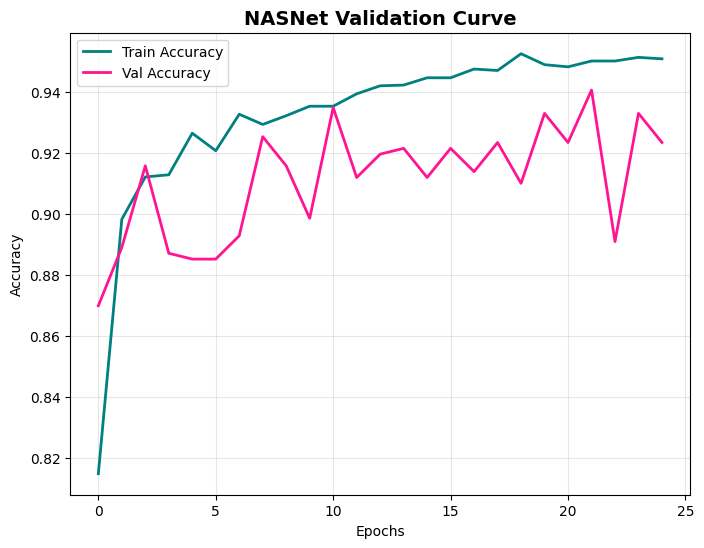

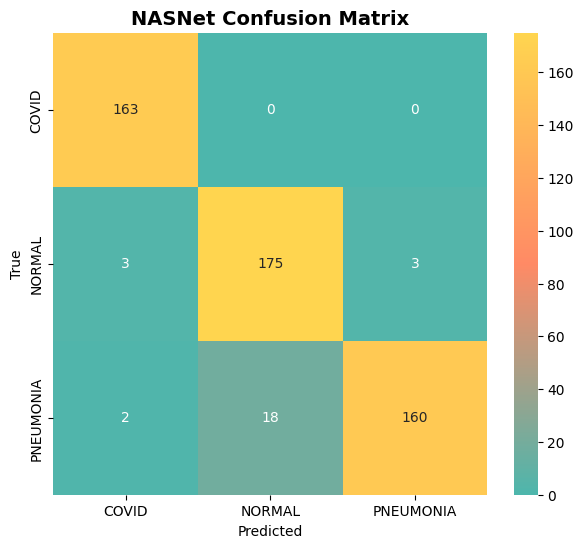

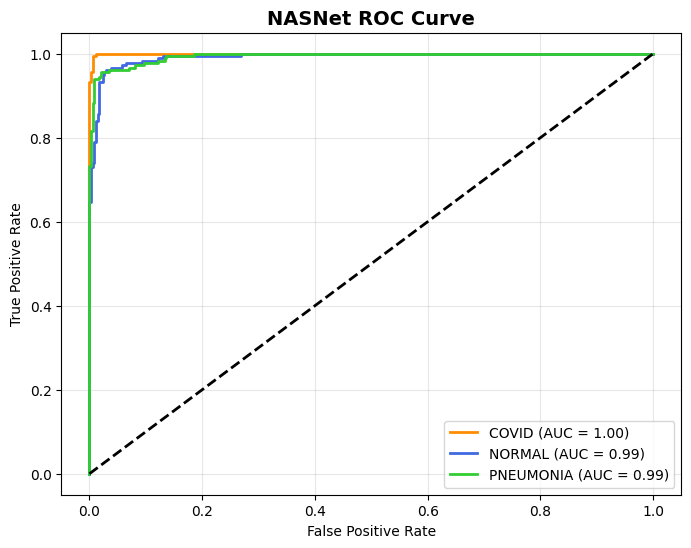

💾 Model saved as nasnet_model.h5


In [4]:
# ===============================
# ⚡ NASNet Biomedical Model
# ===============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# ------------------------------
# ⚙️ Paths
# ------------------------------
nasnet_train_dir = 'processed_dataset/train'
nasnet_val_dir = 'processed_dataset/val'
nasnet_test_dir = 'processed_dataset/test'

# ------------------------------
# 📸 Data Generators
# ------------------------------
nasnet_datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

nasnet_datagen_val = ImageDataGenerator(rescale=1./255)
nasnet_datagen_test = ImageDataGenerator(rescale=1./255)

nasnet_train_gen = nasnet_datagen_train.flow_from_directory(
    nasnet_train_dir,
    target_size=(331, 331),  # NASNetLarge requires 331x331 input
    batch_size=32,
    class_mode='categorical'
)

nasnet_val_gen = nasnet_datagen_val.flow_from_directory(
    nasnet_val_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

nasnet_test_gen = nasnet_datagen_test.flow_from_directory(
    nasnet_test_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ------------------------------
# 🧩 Model Setup
# ------------------------------
nasnet_base = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

# Freeze convolutional base
for layer in nasnet_base.layers:
    layer.trainable = False

x = nasnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
nasnet_predictions = Dense(3, activation='softmax')(x)

nasnet_model = Model(inputs=nasnet_base.input, outputs=nasnet_predictions)

nasnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------
# 🚀 Training
# ------------------------------
nasnet_history = nasnet_model.fit(
    nasnet_train_gen,
    validation_data=nasnet_val_gen,
    epochs=25,
    verbose=1
)

# ------------------------------
# 🧪 Evaluation on Test Set
# ------------------------------
nasnet_test_loss, nasnet_accuracy = nasnet_model.evaluate(nasnet_test_gen)
print(f"\n✅ NASNet Test Accuracy: {nasnet_accuracy:.4f}")

# ------------------------------
# 📊 Predictions & Metrics
# ------------------------------
nasnet_y_pred_probs = nasnet_model.predict(nasnet_test_gen)
nasnet_y_pred = np.argmax(nasnet_y_pred_probs, axis=1)
nasnet_y_true = nasnet_test_gen.classes
nasnet_class_labels = list(nasnet_test_gen.class_indices.keys())

# Compute precision, recall, f1
nasnet_precision, nasnet_recall, nasnet_f1, _ = precision_recall_fscore_support(
    nasnet_y_true, nasnet_y_pred, average='weighted'
)

print(f"🧾 Precision: {nasnet_precision:.4f}")
print(f"🧾 Recall: {nasnet_recall:.4f}")
print(f"🧾 F1-score: {nasnet_f1:.4f}")

# ------------------------------
# 📈 Validation Curves
# ------------------------------
plt.figure(figsize=(8, 6))
plt.plot(nasnet_history.history['accuracy'], label='Train Accuracy', color='teal', linewidth=2)
plt.plot(nasnet_history.history['val_accuracy'], label='Val Accuracy', color='deeppink', linewidth=2)
plt.title("NASNet Validation Curve", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 🔍 Confusion Matrix (Custom Colors)
# ------------------------------
nasnet_cm = confusion_matrix(nasnet_y_true, nasnet_y_pred)
cm_colors = ['#4DB6AC', '#FF8A65', '#FFD54F']  # Soft Teal, Warm Coral, Muted Gold
cmap = LinearSegmentedColormap.from_list("custom_cm", cm_colors)

plt.figure(figsize=(7,6))
sns.heatmap(nasnet_cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=nasnet_class_labels, yticklabels=nasnet_class_labels)
plt.title("NASNet Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# 📉 ROC Curve (One-vs-Rest)
# ------------------------------
n_classes = len(nasnet_class_labels)
nasnet_y_true_bin = label_binarize(nasnet_y_true, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'royalblue', 'limegreen']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(nasnet_y_true_bin[:, i], nasnet_y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{nasnet_class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("NASNet ROC Curve", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# 💾 Save Model
# ------------------------------
nasnet_model.save("nasnet_model.h5")
print("💾 Model saved as nasnet_model.h5")


**Comparision of Results**

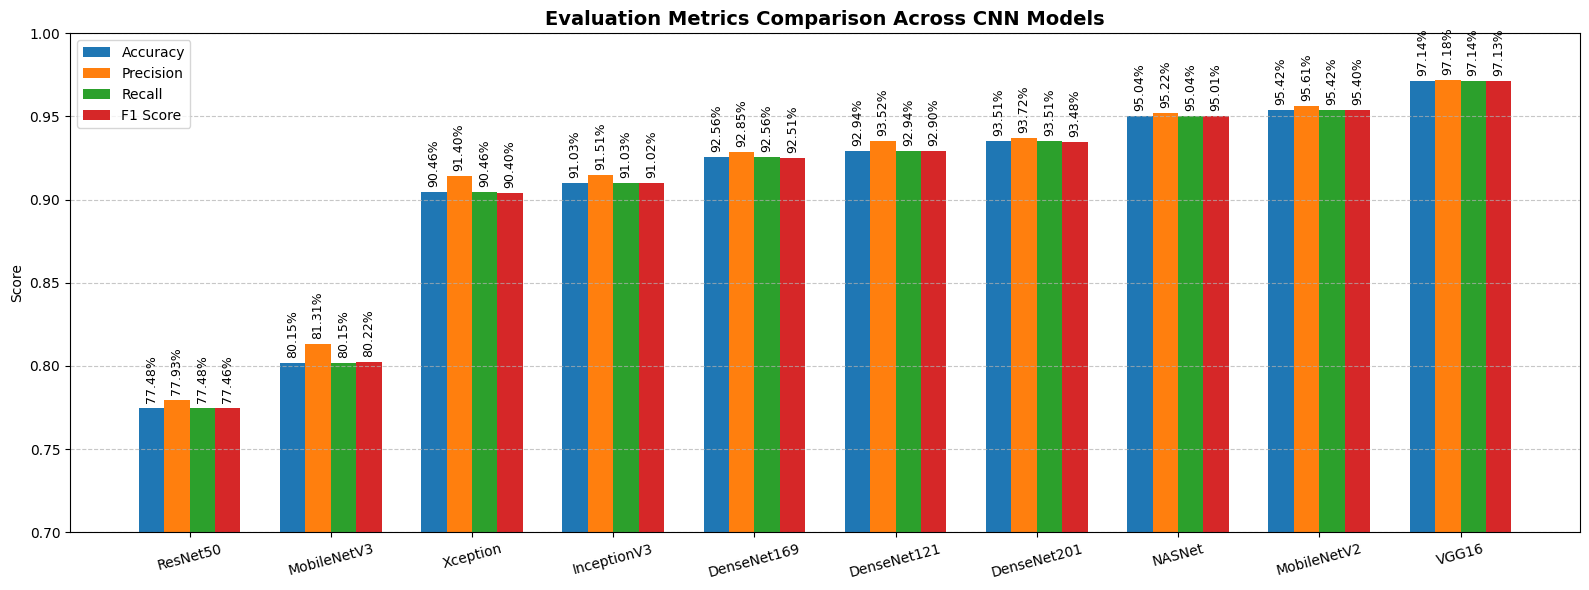

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# ====== Updated evaluation metrics including ResNet50 ======
data = {
    'Model': [
        'InceptionV3', 'Xception', 'DenseNet121', 'DenseNet169', 'DenseNet201',
        'VGG16', 'MobileNetV2', 'MobileNetV3', 'NASNet', 'ResNet50'
    ],
    'Accuracy': [0.9103, 0.9046, 0.9294, 0.9256, 0.9351, 0.9714, 0.9542, 0.8015, 0.9504, 0.7748],
    'Precision': [0.9151, 0.9140, 0.9352, 0.9285, 0.9372, 0.9718, 0.9561, 0.8131, 0.9522, 0.7793],
    'Recall': [0.9103, 0.9046, 0.9294, 0.9256, 0.9351, 0.9714, 0.9542, 0.8015, 0.9504, 0.7748],
    'F1 Score': [0.9102, 0.9040, 0.9290, 0.9251, 0.9348, 0.9713, 0.9540, 0.8022, 0.9501, 0.7746]
}

df = pd.DataFrame(data)

# ====== Optional: sort by Accuracy ascending if desired ======
df = df.sort_values(by='Accuracy').reset_index(drop=True)

# ====== Plot grouped bar chart ======
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = range(len(df['Model']))
width = 0.18

plt.figure(figsize=(16, 6))

# Plot each metric side-by-side
for i, metric in enumerate(metrics):
    bars = plt.bar([p + i * width for p in x], df[metric], width, label=metric)

    # Add vertical percentage labels above each bar (not bold)
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.003,
            f"{height * 100:.2f}%",
            ha='center', va='bottom',
            fontsize=9,
            rotation=90
        )

# ====== Labels and styling ======
plt.xticks([p + 1.5 * width for p in x], df['Model'], rotation=15, fontsize=10)
plt.ylabel("Score")
plt.title("Evaluation Metrics Comparison Across CNN Models", fontsize=14, fontweight='bold')
plt.legend()
plt.ylim(0.7, 1.0)  # keeps the graph zoomed to show subtle differences better
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [6]:
import tensorflow as tf

# The file path string
model_path = "C:\\Users\\sirin\\Desktop\\mini\\vgg16_model.h5"

# Load the model from the .h5 file
try:
    model = tf.keras.models.load_model(model_path)
    
    # Now, call the summary method on the loaded model object
    model.summary()
    
except FileNotFoundError:
    print(f"Error: Model file not found at {model_path}")
except Exception as e:
    print(f"An error occurred while loading or summarizing the model: {e}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,493,957 (120.14 MB)

 Trainable params: 16,779,267 (64.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

*Comparaision with SOTA models*

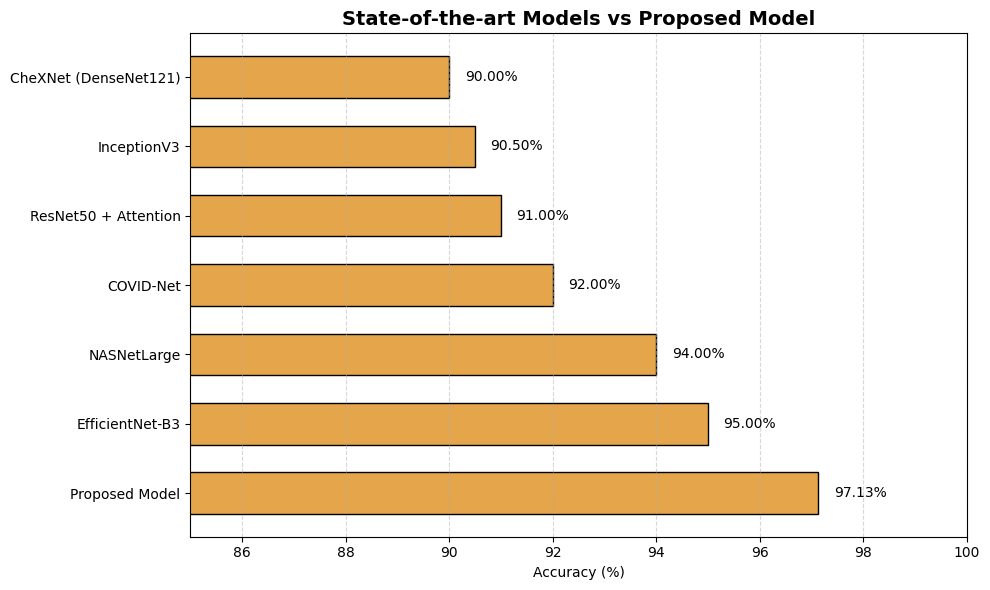

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ====== SOTA models + Proposed Model data ======
models = [
    'CheXNet (DenseNet121)',
    'COVID-Net',
    'ResNet50 + Attention',
    'InceptionV3',
    'NASNetLarge',
    'EfficientNet-B3',
    'Proposed Model'
]

accuracy = [0.90, 0.92, 0.91, 0.905, 0.94, 0.95, 0.9713]  # Accuracy values

df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy
})

# ====== Sort by Accuracy descending ======
df = df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# ====== Horizontal bar chart ======
y = np.arange(len(df['Model']))  # y-axis positions

plt.figure(figsize=(10, 6))

# Plot Accuracy bars
bars = plt.barh(y, df['Accuracy']*100, color="#e5a54a", edgecolor='black', height=0.6)

# Add labels on bars
for i, val in enumerate(df['Accuracy']):
    plt.text(val*100 + 0.3, i, f"{val*100:.2f}%", va='center', fontsize=10)

plt.yticks(y, df['Model'])
plt.xlabel("Accuracy (%)")
plt.title("State-of-the-art Models vs Proposed Model", fontsize=14, fontweight='bold')
plt.xlim(85, 100)  # zoom to high-performance region
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*Model Architecture*

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Load your trained model from .h5 file
model = load_model('vgg16_model.h5')


# Save architecture diagram as a PNG file
plot_model(model,
           to_file='vgg16_finetune_architecture.png', # Output filename
           show_shapes=True,        # Display layer shapes
           show_layer_names=True,   # Display layer names
           dpi=120)                 # High resolution for publications


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [2]:
import sys
print(sys.executable)
import pydot
print(pydot.__file__)


c:\Program Files\Python312\python.exe
C:\Users\sirin\AppData\Roaming\Python\Python312\site-packages\pydot\__init__.py


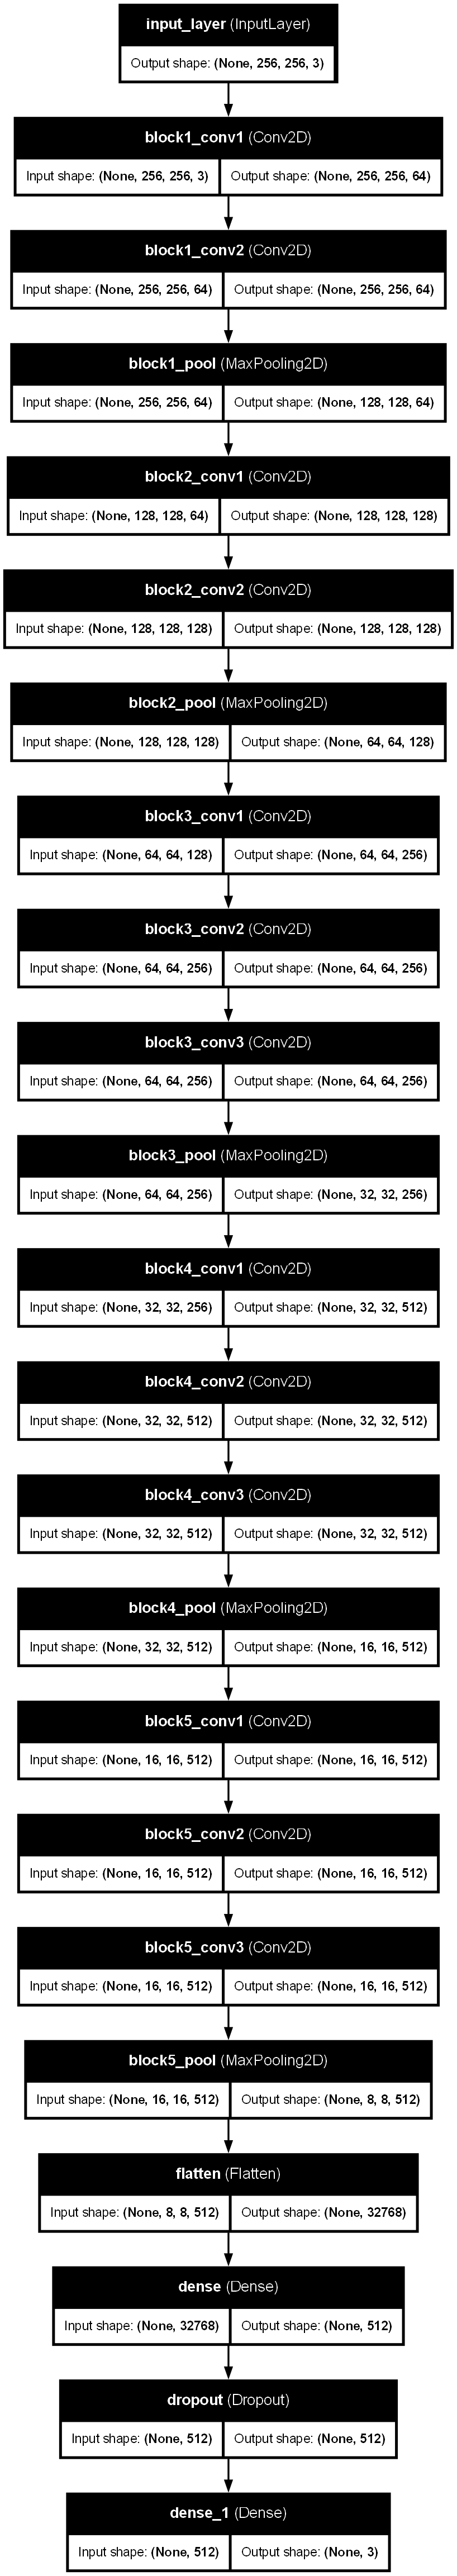

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg16_finetune_architecture.png', show_shapes=True, show_layer_names=True,dpi=120)
